# Relatório de análises estatísticas - Desafio Cientista de Dados

O presente relatório será apresentado seguindo a seguinte estrutura:

1 - Análise exploratória dos dados (EDA)

2 - Perguntas

3 - Explicação do modelo preditivo

4 - Conclusões

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/ny_daily_rental_prices.csv')

# 1. Análise exploratória dos dados (EDA)

## 1.1. Características gerais

In [3]:
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [5]:
df.nunique()

id                               48894
nome                             47904
host_id                          37457
host_name                        11452
bairro_group                         5
bairro                             221
latitude                         19048
longitude                        14718
room_type                            3
price                              674
minimo_noites                      109
numero_de_reviews                  394
ultima_review                     1764
reviews_por_mes                    937
calculado_host_listings_count       47
disponibilidade_365                366
dtype: int64

Este banco de dados apresenta informações referentes a apartamentos listados em um site de aluguéis temporários na cidade de Nova York (NY). Algumas das informações dispostas incluem a geolocalização exata, o que permite a precisão na localização dos imóiveis. Podemos observar que os apartamentos disponíveis na plataforma de aluguéis estão localizados em 221 bairros inseridos dentro dos 5 boroughs da cidade de NY. Esses dados podem levantar hipóteses sobre a preferência dos hóspedes por localidade.

Em relação aos detalhes das acomodações, é possível inferir que são oferecidos 3 tipos de acomodações/quartos. No entanto, não são apresentadas informações como área útil, número de banheiros ou acesso a amenidades (elevador, piscina, academia, etc), sendo esses fatores importantes na determiniação do preço de aluguel. 

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


A variável chave a ser analisada nesse exercício é o preço. A média de preço da diária é $152,72, com valores entre $0,00 e $10000,00. Essa diferença entre os valores mínimo e máximo indicam que os dados não estão uniformemente distribuídos. Ainda, apartamentos listados com valor de $0,00 a diária podem indicar um erro de imputação do dado, ou casos exepcionais. 

O número de anúncios por anfitrião varia entre 1 e 327, o que indica que alguns anfitriões podem ser hotéis ou empresas terceirizadas que realizam os alugueis em nome dos proprietários. 

In [7]:
len(df[df['price']>1000])

239

In [8]:
len(df[df['price']==0])

11

Ainda, podemos observar que existem 11 anúncios com o valor da diária $0,00 e 239 anúncios com valor acima de $1000,00.

In [9]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Existem dados faltantes nas variáveis de nome do anúncio, no nome anfitrião, na data da última review e no número de reviews por mês. Considerando que essas variáveis provavelmente não tem impacto significativo no valor do aluguel, os valores faltantes não serão descartados da base.

Antes de seguir com a EDA, é necessária a limpeza do banco de dados. A seguir serão elimidados os valores outliers da variável preço utilizando o método de intervalo interquartil. Também serão renomeadas e reordenadas algumas variáveis para maior clareza durante as análises.

In [10]:
df1 = df[(df['price'] > df['price'].quantile(0.05)) & (df['price'] < df['price'].quantile(0.95))]

In [11]:
df1 = df1.rename(columns={"nome": "name", "bairro_group": "borough","bairro":"neighborhood","minimo_noites":"min_nights","numero_de_reviews":"num_reviews","ultima_review":"last_review","reviews_por_mes":"reviews_month","calculado_host_listings_count":"listings_per_host","disponibilidade_365":"availability_365"})

In [12]:
df1 = df1[['id','price','room_type','borough','neighborhood','latitude','longitude','min_nights','availability_365','name','num_reviews','last_review','host_id','listings_per_host','host_name']]

In [13]:
df1.head()

,id,price,room_type,borough,neighborhood,latitude,longitude,min_nights,availability_365,name,num_reviews,last_review,host_id,listings_per_host,host_name
0,2595,225,Entire home/apt,Manhattan,Midtown,40.75362,-73.98377,1,355,Skylit Midtown Castle,45,2019-05-21,2845,2,Jennifer
1,3647,150,Private room,Manhattan,Harlem,40.80902,-73.94190,3,365,THE VILLAGE OF HARLEM....NEW YORK !,0,NaN,4632,1,Elisabeth
2,3831,89,Entire home/apt,Brooklyn,Clinton Hill,40.68514,-73.95976,1,194,Cozy Entire Floor of Brownstone,270,2019-07-05,4869,1,LisaRoxanne
3,5022,80,Entire home/apt,Manhattan,East Harlem,40.79851,-73.94399,10,0,Entire Apt: Spacious Studio/Loft by central park,9,2018-11-19,7192,1,Laura
4,5099,200,Entire home/apt,Manhattan,Murray Hill,40.74767,-73.97500,3,129,Large Cozy 1 BR Apartment In Midtown East,74,2019-06-22,7322,1,Chris


## 1.2. Relação entre preço e variáveis do banco

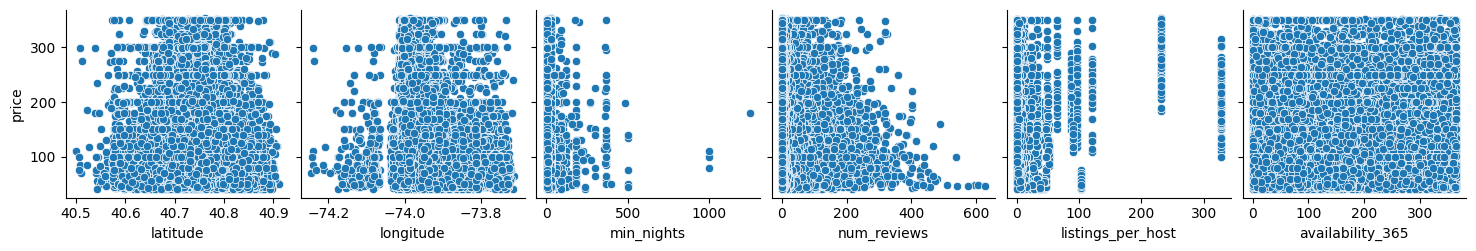

In [14]:
sns.pairplot(data=df1,
    y_vars=["price"],
    x_vars=[
        "latitude",
        "longitude",
        "min_nights",
        "num_reviews",
        "listings_per_host",
        "availability_365",
    ],
)

Analisando a variável de interesse em relação a outras variáveis contínuas do banco de dados, podemos observar há uma distribuição razoável entre o preço e a latidude e longitude, porém não fica evidente uma relação significativa com as outras variáveis.

Text(0.5, 1.0, 'Price distribution histogram')

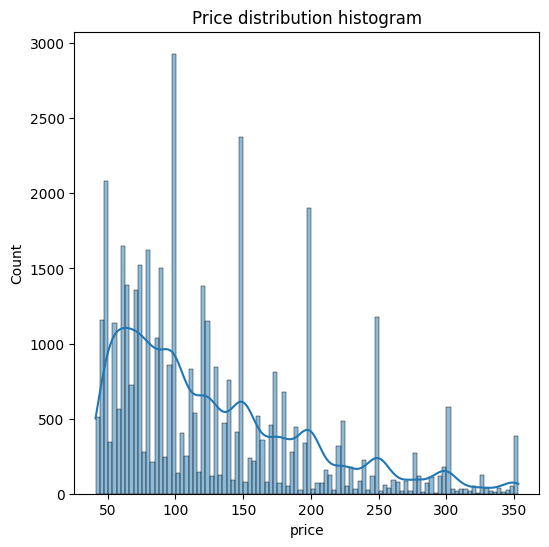

In [63]:
plt.subplots(figsize=(6, 6))
sns.histplot(df1['price'], kde=True, bins=100)
plt.title('Price distribution histogram')

Text(0.5, 1.0, 'Price per borough')

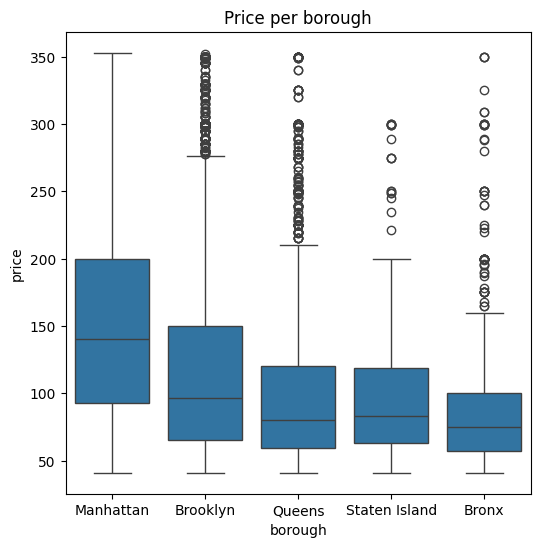

In [64]:
plt.subplots(figsize=(6, 6))
sns.boxplot(x='borough',y='price',data=df1)
plt.title('Price per borough')

O histograma de distribuíção do preço demonstra assimetria e o gráfico box plot a presença de outliers, o que pode prejudicar as análises preditivas.

### Preço da diária de acordo com localização e tipo de acomodação

In [17]:
df1['borough'].value_counts()

borough
Manhattan        19478
Brooklyn         18064
Queens            4921
Bronx              866
Staten Island      301
Name: count, dtype: int64

In [18]:
df1['neighborhood'].value_counts()


neighborhood
Williamsburg          3716
Bedford-Stuyvesant    3296
Harlem                2483
Bushwick              2112
Upper West Side       1790
                      ... 
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Westerleigh              1
Name: count, Length: 219, dtype: int64

<Axes: xlabel='borough', ylabel='price'>

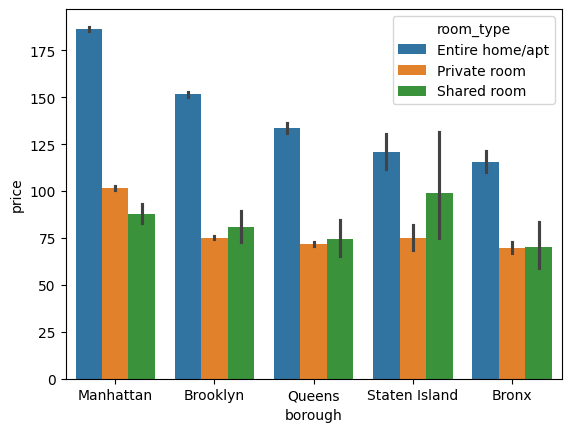

In [19]:
sns.barplot(x='borough',y='price',hue='room_type',data=df1)

Podemos observar que a maior quantidade de anúncios está localizada em Manhattan, onde há a maior média de preço, o que está de acordo com o conhecimento popular. Adicionalmente, nota-se que o tipo de acomodação de maior valor é o de apartamento/casa inteira, havendo uma redução significativa de preço quando comparando com quartos privativos ou compartilhados, o que também faz sentido. Ainda além, podemos notar que o preço de quartos compartilhados possui uma variancia de preço maior em comparação com os outros tipos de acomoção no mesmo bairro, especialmente em Staten Island. Contudo, é importante destacar que Staten Island tem o menor número de anúncios, aproximadamente menos de 2% do número de anúncios somente em Manhattan, por exemplo.

# 2. Respostas das perguntas do desafio

## 2.1. Onde seria mais indicada a compra de um imóvel visando investir para retorno com aluguéis de diária?
O dataset em questão não apresenta informações sobre o valor dos imóveis, dessa forma, não é possível orientar quanto ao retorno sobre o investimento apenas com o dataset fornecido. Portanto, foi utilizado um dataset externo encontrado no [Kaggle](https://www.kaggle.com/code/mdismielhossenabir/preprocessing-and-eda-using-random-forest-model?select=NY-House-Dataset.csv). Com base nas informações adicionais desse dataset, podemos tentar fazer uma medida da rentablidade dos imóveis levando em consideração a média de preço dos aluguéis temporários pela média de preço de imóveis no mesmo bairro.

In [72]:
mean_price = df1[df1['room_type']=='Entire home/apt'].groupby('borough').mean(numeric_only=True)['price']

In [73]:
data = pd.read_csv('datasets/NY-House-Dataset.csv')
price_loc = data.groupby('SUBLOCALITY').mean(numeric_only=True)['PRICE']

In [77]:
mean_price/price_loc[mean_price.index.intersection(price_loc.index)]

Bronx                 NaN
Brooklyn         0.000175
Manhattan        0.000052
Queens           0.000301
Staten Island    0.000271
dtype: float64

0.03% do valor do investimento inicial (valor do imóvel) é retornado na diária de aluguel. 

No entanto é preciso analisar alguns cenários:

 - É para moradia e aluguel de quarto (privado ou não)?
 - É para aluguel de apartamento inteiro?

Esse conceito é conhecido como vacância física do imóvel, ou seja, é o percentual de espaço em relação ao total de área disponível para locação. Também, seria necessário saber a taxa de vacância financeira dos imóveis para saber com maior precisão o retorno do investimento. Por exemplo, um imóvel no Queens pode ser menos procurado, o que pode diminuir a taxa de vacância financeira. Isso influenciaria diretamento no retorno do investimento. Outra limitação dessa análise é que não foi investigado o valor médio de manutenção de um imóvel nessas localidades.

Por fim, se a compra for com o intuito de somente para alugar um apartamento/casa anualmente, o bairro Queens parece ser o mais indicado.

# 2.2. Influência do número mínimo de noites e disponibilidade anual no preço do anúncio

<Axes: >

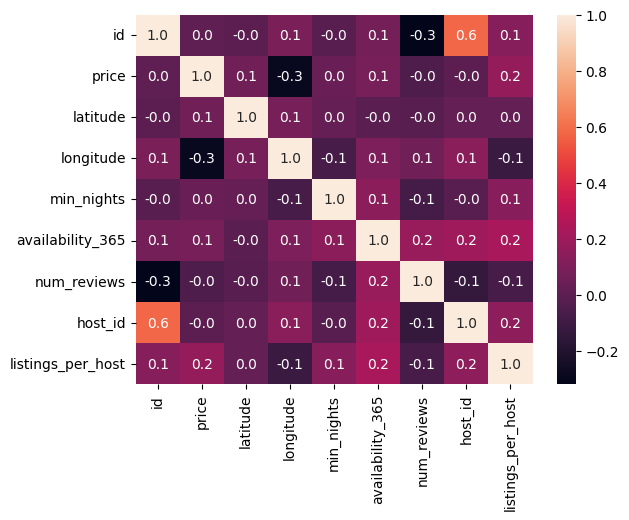

In [20]:
sns.heatmap(df1.corr(numeric_only=True),annot=True,fmt='.1f')

De acordo com a matriz de correlação acima, nem a disponibilide anual, nem o mínimo de noites tem correlação com o preço, indicando que esses fatores não interferem na precificação considerando esse conjunto de dados. Em contrapartida, pode-se argumenar que o mínimo de noites e a disponibilidade anual, por mais que não interfiram no preço, podem ter influência na rentabilidade do imóvel para o proprietário. Por exemplo, faz sentido que um imóvel com número mínimo de noites muito alto seja menos alugado que um imóvel com menos restrição desse aspecto, mesmo que o preço da diária seja o mesmo. Esse tipo de conceito é conhecido como vacância física do imóvel.

Visto que foi observado anteriormente uma diferença no gráfico de barras entre os preços da diária dependendo do tipo de acomodação, é interessante investigar a relação das categorias de quarto com o preço.

Apesar de ser usual o onehot encoding durante a transformação de variáveis categóricas em numéricas, aqui será utilizada a média de preço pelo tipo de quarto (técnica conhecida como target encoding), e seguindo a lógica de que um quarto compartilhado seria o tipo mais barato de acomodação, apesar de a média ter sido igual entre quarto privado e compartilhado, será designado um número inferior ao tipo de quarto compartilhado para que se possa manter a ordem.

In [21]:
 
df1.groupby('room_type')['price'].mean().astype(int)

room_type
Entire home/apt    166
Private room        84
Shared room         84
Name: price, dtype: int64

E o mesmo pode ser dito para o preço por bairro. Ainda, a transformação da variável bairro por onehot enconding resultaria em 221 novas colunas no banco de dados. Portanto, será utilizado o target encoding para a transformação dessa variável.

In [22]:
df1.groupby('borough')['price'].mean().astype(int)

borough
Bronx             88
Brooklyn         113
Manhattan        151
Queens            97
Staten Island    101
Name: price, dtype: int64

In [23]:
df1['room_type_cat'] = df1['room_type'].map({'Shared room':70,'Private room':84,'Entire home/apt':166})
df1['neighborhood_cat'] = df1['neighborhood'].map(df1.groupby('neighborhood')['price'].mean().astype(int).to_dict())

<Axes: >

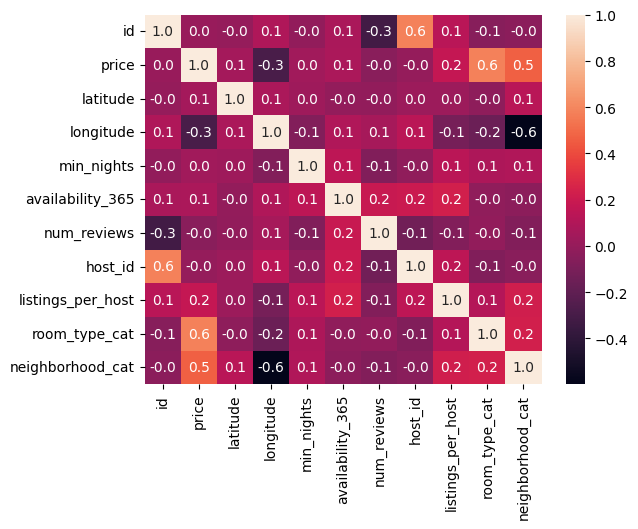

In [24]:
sns.heatmap(df1.corr(numeric_only=True),annot=True,fmt='.1f')

Nessa nova matriz podemos observar que o tipo de acomodação parece ser a variável com maior correlação com o preço da diária quando comparado com as outras variáveis desse conjunto de dados. Dessa forma, o tipo de acomodação parece uma variável importante para o modelo preditivo. 

## 2.3. Existe algum padrão no texto do nome do local para lugares de mais alto valor?

Para determinar se há algum padrão no uso de palavras em anúncios de alto valor, pode-se calcular a frequencia de termos utilizados nesses anúncios. Utilizando o TfidfVectorizer, é possível realizar essa contagem tanto para os anúncios de maior valor quanto para os de menor e verificar se há uma distinção. Para tanto, inicialmente será feita a sanitização dos nomes dos anúncios.


In [27]:
import re
# Preprocess listing names
def preprocess_text(text):
    if pd.notnull(text):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        return text
    else:
        return ''

df1['name_clean'] = df1['name'].apply(preprocess_text)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
m = TfidfVectorizer(max_features=10, analyzer='word', stop_words='english', max_df=0.8)
corpus = df1.sort_values(by='price', ascending=False)['name_clean']
print('Termos utilizados nos anúncios mais caros')
print(m.fit(corpus.head(1000)).get_feature_names_out())
print('Termos utilizados nos anúncios mais baratos')
print(m.fit(corpus.tail(1000)).get_feature_names_out())

Termos utilizados nos anúncios mais caros
['1br' 'apartment' 'apt' 'bedroom' 'blueground' 'loft' 'luxury' 'park'
 'spacious' 'village']
Termos utilizados nos anúncios mais baratos
['apartment' 'bedroom' 'brooklyn' 'bushwick' 'cozy' 'manhattan' 'private'
 'room' 'spacious' 'sunny']


Nota-se que para anúncios de alto valor, termos como 'luxury', 'park' e 'loft' são bastante utilizados, denotando apartamentos luxosos, próximos ao Central Park e no ático. Em contraponto, anúncios de baixo valor utilizam termos como 'cozy', 'brooklyn'/'bushwick' e 'private', denotando apartamentos confortáveis, em regiões menos valorizadas como Brooklyn/Bushwick e são anúncios de quarto.

Adicionalmente, pode-se buscar entender qual o nível de associação das palavras utilizadas com o respectivo valor do anúncio. Para tanto, utiliza-se o TfidfVectorizer para transformar as palavras em atributos do modelo de regressão. Realizando então o ajuste do modelo, podemos analisar os coeficientes do mesmo, buscando os coeficientes de maior magnitude (denotando maior associação com o preço). Nesse caso, coeficientes positivos determinam uma associação positiva com o preço, ou seja, quando o anúncio utiliza palavras como 'luxury', o anúncio tende a ser mais caro. O oposto é válido para coeficientes negativos, e.g., anúncios com 'cozy' tendem a ser mais baratos.

In [ ]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df1[['name_clean']]
y = df1['price']

text_transformer = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=100, analyzer='word', stop_words='english', max_df=0.8))  # Limit to top 50 important terms
])

preprocessor = ColumnTransformer(
    transformers=[
        ('text', text_transformer, 'name_clean')
    ]
)

# Create Full Pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())  # Ridge regression for regularization
])


model.fit(X, y)
y_pred = model.predict(X)

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Root Mean Squared Error (RMSE): 61.18
R² Score: 0.25


In [29]:
tfidf_feature_names = model.named_steps['preprocessor'].named_transformers_['text']['tfidf'].get_feature_names_out()

# Extract coefficients from Ridge regression
coefs = model.named_steps['regressor'].coef_

# Find the coefficients corresponding to the TF-IDF features
tfidf_coefficients = coefs[:len(tfidf_feature_names)]

# Create a DataFrame to analyze word influence
word_influence = pd.DataFrame({
    'word': tfidf_feature_names,
    'coef': tfidf_coefficients
}).sort_values(by='coef', ascending=False)

print("10 Palavras mais positivamente correlacionadas com o preço :")
print(word_influence.head(10))  # Top 10 positively correlated words

print("\n\n10 Palavras mais negativamente correlacionadas com o preço :")
print(word_influence.tail(10))  # Top 10 negatively correlated words

10 Palavras mais positivamente correlacionadas com o preço :
       word       coef
27  chelsea  74.493868
82   sonder  69.498227
35   duplex  68.630216
2       2br  63.377848
95    views  62.361920
60  midtown  60.551940
58   luxury  60.414588
96  village  56.027016
81     soho  54.119897
1       1br  46.336129


10 Palavras mais negativamente correlacionadas com o preço :
        word       coef
33      cozy -29.205803
63   minutes -30.086572
75  prospect -30.453334
6    astoria -31.245542
91     train -31.285796
51       jfk -37.330015
15   bedstuy -37.984633
74   private -41.232128
24  bushwick -52.067926
79      room -92.170835


Com isso, conseguimos identificar que anúncios com palavras como jfk e train, tendem a ser mais baratos que anúncios com palavras como view e rooftop. Possivelmente mostrando que as acomodações próximas aos meios de transporte sejam mais voltadas para pessoas em situação de trabalho (que buscam acomodação em conta), já listagens de apartamentos com vista/no ático são mais caras pois são visadas por pessoas em viajens turística.

Finalmente, destaca-se que esse modelo foi treinado com o conjunto de dados na sua integridade, sem o devido cuidado na separação em subconjuntos de treinamento validação e teste pois trata-se de um estudo pontual, sem o objetivo de realizar previsões.

# 3. Explicação do modelo preditivo

A previsão de preços para diárias de aluguéis nesse banco pode ser realizada com técnicas de machine learning envolvendo algoritmos de aprendizado. Como o preço (variável dependente ou desfecho) é uma variável contínua, poderia ser utilizado modelo de regressão linear. No entanto, esse tipo de modelo só rende resultados produtivos quando as variáveis envolvidas apresentam uma distribuição normal. Fato que raramente acontece em situações da vida real. Por esse motivo, serão utilizados algoritmos mais indicados para dados com distribuição assimétrica como é o caso do banco de dados disponível para esse exercício. 

As variáveis independentes utilizadas foram o tipo de acomodação, bairro, número de anúncios por anfitrião, disponibilidade anual de reserva, número mínimo de noites e o número de reviews por mês. Além da retirada dos valores outliers pelo método do intervalo interquartil, as variáveis categóricas de tipo de acomodação e bairro foram transformadas em numéricas ordinais seguindo o método de target encoding, conforme descrito anteriormente.

Com base no trabalho publicado por [Chan, 2024](https://www.researchgate.net/publication/379524943_Rent_Price_Prediction_with_Advanced_Machine_Learning_Methods_A_Comparison_of_California_and_Texas), e também observando diferentes datasets no Kaggle, foram testados os diferentes modelos:

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    RandomForestRegressor,
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import (
    LinearRegression,
    HuberRegressor,
    RANSACRegressor,
    TheilSenRegressor,
    Ridge,
    Lasso,
    BayesianRidge,
    ElasticNet,
)

In [39]:
X = df1[['room_type_cat','neighborhood_cat','listings_per_host','availability_365','min_nights','num_reviews']]
y = df1['price']

In [40]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train-Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

O conjunto de dados foi segregado em subconjuntos de treinamento (60%), validação (20%) e teste (20%), sendo importante destacar a distinção entre os três:
 - Conjunto de treinamento: é utilizado para treinar os pesos do modelo no algoritmo de otimização
 - Conjunto de validação: é utilizado para confirmar que o modelo está dentro das expectativas. Também pode-se dizer que é utilizado para realizar o aprimoramento dos hiperparâmetros (parametros aqueles que são informados ao algoritmo de otimização dos pesos)
 - Conjunto de teste: por fim, é o conjunto reservado para ser utilizado somente quando o modelo estiver finalizado. Os dados desse conjunto não devem ser acessados visando evitar o vazamento de dados no processo de desenvolvimento do modelo. Caso a performance do modelo no conjunto de testes não seja satisfatória a ponto de sugerir uma refatoração do modelo, um novo conjunto de testes deve ser obtido, conjunto esse nunca antes visto e o conjunto atual pode ser somado ao conjunto de treinamento/validação.

 As métricas escolhidas para avaliar a performance do modelo são o Root Mean Squared Error (RMSE) e o coeficiente de determinação (R2). O RMSE foi escolhido por ser mais rígido com valores outliers e mantém a mesma unidade da variável resposta (y). E o R2 indica em percentual o quanto que as variáveis de exposição explicam a variância na variável resposta (y).

In [42]:
dict_regression = {
    "LinearRegression": LinearRegression(),
    "HuberRegressor": HuberRegressor(),
    "RANSACRegressor": RANSACRegressor(),
    "TheilSenRegressor": TheilSenRegressor(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
}

df_summary = pd.DataFrame(columns=["model", "rmse", "mae", "r2"])
lst_dict = []

for model_desc, model in dict_regression.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    lst_dict.append(
        {
            "model": model_desc,
            "rmse": np.sqrt(mean_squared_error(y_val, y_pred)),
            "mae": mean_absolute_error(y_val, y_pred),
            "r2": r2_score(y_val, y_pred),
        }
    )
df_summary = df_summary._append(lst_dict)
df_summary.sort_values(by=["r2"], ascending=False).reset_index(drop=True)

/var/folders/fp/x27sgnh154v_jqt4nmyxdxg80000gp/T/ipykernel_88244/2473139223.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_summary = df_summary._append(lst_dict)


,model,rmse,mae,r2
0,GradientBoostingRegressor,49.520575,35.479711,0.516728
1,Lasso,51.914895,37.601845,0.468866
2,ElasticNet,51.915236,37.601753,0.468859
3,BayesianRidge,51.915668,37.601352,0.468850
4,Ridge,51.915729,37.601113,0.468849
5,LinearRegression,51.915729,37.601113,0.468849
6,RandomForestRegressor,51.941541,37.093100,0.468321
7,HuberRegressor,52.846724,36.778176,0.449628
8,ExtraTreesRegressor,53.484487,37.875265,0.436264
9,KNeighborsRegressor,53.929402,38.614187,0.426846


Mantendo os mesmos parâmetros o modelo que apresentou melhor performance de acordo com as métricas de RMSE e R2 foi o Gradient Boosting Regressor. 

O Gradient Boosting Regressor é indicado para conjunto de dados com complexidades da vida real, que não apresentam distribuição normal. No entanto, ele oferece risco de overfitting em conjuntos de dados pequenos, e é necessário maior cautela na escola de hiperparâmetros. Além disso, pode apresentar complexidade na interpretação e demora no tempo de treinamento.

## Previsão vs. Valor real no conjunto de testes

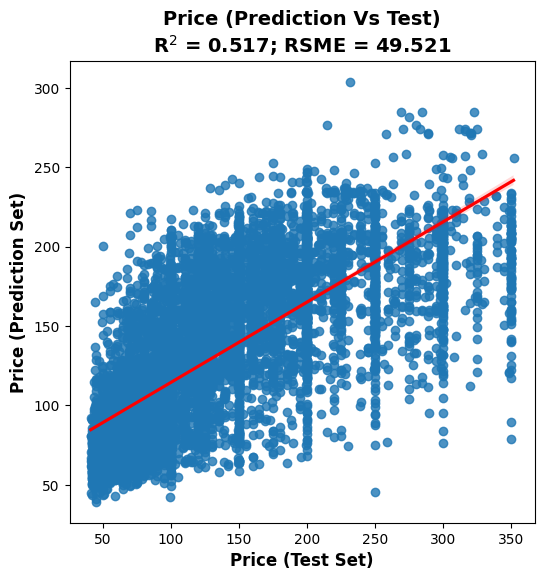

In [62]:
model_name = "GradientBoostingRegressor"

model = dict_regression[model_name]
err_data = df_summary[df_summary['model']==model_name]

plt.subplots(figsize=(6, 6))
sns.regplot(
    x=y_test, y=model.predict(X_test), line_kws={"color": "red"}
)
plt.xlabel("Price (Test Set)", fontsize=12, fontweight="bold")
plt.ylabel("Price (Prediction Set)", fontsize=12, fontweight="bold")
plt.title(
    f"Price (Prediction Vs Test)\nR$^{2}$ = {err_data['r2'].iloc[0]:.3f}; RSME = {err_data['rmse'].iloc[0]:.3f}",
    fontsize=14,
    fontweight="bold",
)
plt.show()

A performance do modelo no conjunto de teste parece ter sido adequado, visto que esses dados não haviam sido vistos durante o processo de desenvolvimento do modelo ou durante a sua otimização.

## 3.1 Supondo um apartamento com as seguintes características:

{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?



In [82]:
model.predict(df1[df1['id']==2595][['room_type_cat','neighborhood_cat','listings_per_host','availability_365','min_nights','num_reviews']])

array([217.83817099])

In [83]:
df1[df1['id']==2595][['price']]

,price
0,225


A sugestão de preço (valor previsto) seria de $217,84, sendo que o valor real da diária desse apartamento é bem próximo ($225,00)

In [84]:
import pickle
with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# 4 Conclusões

- Manhattan parece ser o local com maior número de anúncios e também os maiores valores de diárias.

- Os anúncios para casa e apartamento inteiros são também os mais anunciados e caros.

- Os anúncios com palavras como luxury parecem ser mais caros e com palavras como cozy parecem ser mais baratos.

- Por fim, acredito que para fazer uma previsão melhor, seria importante ter mais variáveis como a área útil de cada imóvel, o acesso a amenidades do prédio ou local, dentre outras informações. 
